# <center> Analisis Predictivo de Negocios <center>
# <center>  Analisis de Segmentacion <center>
<center> Tarea 5  <center>
<center>  Aura Gonzalez 1106920 <center>

presentacion y timeline disponible en Miro:




Github:



<h2><center>Objetivo:</center></h2>
<p>El objetivo de este estudio es clasificar en segmentos los clientes de Starbucks segun sus actividades transaccionales.</p>

### Datos
Los datos los proporciona Starbucks y están disponibles en [Kaggle](https://www.kaggle.com/ihormuliar/starbucks-customer-data), con licencia de [Acuerdo de licencia de datos comunitarios - Permisivo - Versión 1.0](https://cdla.dev/permissive-1-0/). Se proporcionan tres archivos que contienen datos sobre los tres temas:

- portfolio.csv: datos sobre ofertas enviadas a clientes 

- perfil.csv - datos demográficos de los clientes 
    
- transcript.csv: respuesta del cliente a ofertas y transacciones realizadas 
    

Durante el mes de campaña se enviaron ofertas de diferente tipo, duración, recompensa y dificultad a los clientes a través de diferentes canales (redes sociales, correo electrónico, aplicación móvil y sitios web). Hay 17.000 clientes en el conjunto de datos cuya edad, sexo, ingresos y fecha de convertirse en miembro se proporcionan. Durante el mes de la campaña, se enviaron ofertas a los clientes a través de una combinación de canales promocionales cada pocos días. No todos los clientes han recibido el mismo número de ofertas. La mayoría de los clientes recibieron entre 3 y 5 durante el mes y algunos incluso no recibieron ninguno.

Las respuestas de los clientes a estas ofertas y transacciones realizadas durante el mes se proporcionan y se registran como _eventos_. Hay tres tipos de eventos relacionados con la oferta, es decir, oferta recibida, oferta vista y oferta completada, y otro tipo de evento llamado transacción, es decir, compras realizadas por un cliente. También se proporciona la hora en que ocurrió cada evento, en forma de horas desde el inicio de la campaña (la primera oferta se envió cuando tiempo = 0 hora).

<h2><center>Metodologia</center></h2>

### 1. Manipulacion de datos
Los datos se leyeron en tres Pandas DataFrames. En la manipulación de datos, cada DataFrame se limpió y transformó para prepararlo para el análisis.

### 2. Análisis de datos exploratorios (EDA)
Primero realicé EDA en los tres DataFrames individualmente para obtener una comprensión profunda de los datos. Se realizó un análisis univariante de todos los DataFrames, proporcionando un resumen de las estadísticas de todas las variables de cada tema (ofertas, clientes y eventos) en los datos. Se utilizó un análisis bivariado de los datos demográficos de los clientes para comprender la relación empírica entre la edad, el sexo y los ingresos de los clientes de la empresa. 


### 3. Segmentación de clientes
Realicé una segmentación de clientes basada en el comportamiento del cliente. Se utilizó KMeans Clustering para encontrar segmentos de clientes que comparten patrones de comportamiento similares.



****

## Imprtando librerias

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# plt.style.use('fivethirtyeight')
# sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.decomposition import PCA

## Importando la data necesaria

The dataset has three tables, containing offer data, customer profile and transaction data. They will be assigned to DataFrames `df_offer`, `df_customer` and `df_transcript`.

In [2]:
# df_offer = pd.read_csv('/kaggle/input/starbucks-customer-data/portfolio.csv')
# df_offer.head()
# df_customer = pd.read_csv('/kaggle/input/starbucks-customer-data/profile.csv')
# df_customer.head()
# df_transcript = pd.read_csv('/kaggle/input/starbucks-customer-data/transcript.csv')
# df_transcript.head()

In [4]:
df_offer = pd.read_csv(r'C:\Users\augon\OneDrive\Desktop\portfolio.csv')
#check the data
df_offer.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [5]:
df_customer = pd.read_csv(r'C:\Users\augon\OneDrive\Desktop\profile.csv')
#check the data
df_customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
df_transcript = pd.read_csv(r'C:\Users\augon\OneDrive\Desktop\transcript.csv')
#check the data
df_transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


## Limpieza de datos

In [7]:
df_offer = df_offer.drop('Unnamed: 0', axis = 1)
df_customer = df_customer.drop('Unnamed: 0', axis = 1)
df_transcript = df_transcript.drop('Unnamed: 0', axis = 1)

### Verificando si la data tiene valores faltantes

In [108]:
df_offer.isna().sum()

reward         0
channels       0
difficulty     0
duration       0
offer_type     0
id             0
offer_alias    0
dtype: int64

In [9]:
df_customer.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [10]:
df_transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

No falta ningún valor en df_offer y df_transcript.

Para df_customer, faltan 2175 valores en la columna género y la misma cantidad de valores faltantes en la columna ingresos. Es necesario comprobar si estos valores faltantes provienen de las mismas observaciones.

In [11]:
missing_gender = df_customer[df_customer['gender'].isna()]
missing_income = df_customer[df_customer['income'].isna()]

np.sum(missing_gender['id'] == missing_income['id'])

2175

Todos los valores faltantes en las columnas género e ingresos provienen de las mismas observaciones. Como hay suficientes observaciones en nuestros datos para el análisis se eliminaran estas obervaciones.

#### Eliminar filas con valores faltantes en `df_customer`

In [12]:
id_to_remove = missing_income['id']
df_customer_no_na = df_customer[~df_customer['id'].isin(id_to_remove)]
df_customer_no_na = df_customer_no_na.reset_index(drop = True)
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


Despues de haberlos eliminados, chequeamos que no faltan valores en `df_customer_no_na`.

### Tipos de datos

In [13]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [14]:
channels_0 = df_offer['channels'][0]
offer_type_0 = df_offer['offer_type'][0]
id_0 = df_offer['id'][0]

print('First value in column channels:', channels_0, '  --   Data type:', type(channels_0))
print('First value in column offer_type:', offer_type_0, '  --   Data type:', type(offer_type_0))
print('First value in column id:', id_0, '  --   Data type:', type(id_0))

First value in column channels: ['email', 'mobile', 'social']   --   Data type: <class 'str'>
First value in column offer_type: bogo   --   Data type: <class 'str'>
First value in column id: ae264e3637204a6fb9bb56bc8210ddfd   --   Data type: <class 'str'>


In [15]:
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


In [16]:
df_customer_no_na['became_member_on'] = pd.to_datetime(df_customer_no_na['became_member_on'], format = '%Y%m%d')

In [17]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [18]:
# Rename column `time`
df_transcript.rename(columns = {'time' : 'hours_since_start'}, inplace = True)
df_transcript.head(1)

,person,event,value,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0


## 1.2 Data Transformation

Hay que agregar un alias a cada oferta para facilitar el reconocimiento y la referencia.

In [20]:
# Sort df offers
df_offer = df_offer.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Colunma de referencia:
from string import ascii_uppercase
df_offer['offer_alias'] = [ascii_uppercase[i] for i in range(df_offer.shape[0])]
df_offer

,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J


Ahora hay que separarar las claves y los valores para facilitar la manipulación.

In [21]:
value_column = df_transcript['value']
value_column = value_column.apply(eval)
value_column[:3]

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
Name: value, dtype: object

In [22]:
# Extract the keys
dictionary_key_column = [list(d.keys())[0] for d in value_column]
# Extract the values
dictionary_value_column = [list(d.values())[0] for d in value_column]
# Create a df containing the keys and values of the dictionary elements of `value_column`
value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column
value_column_split.head(3)

,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5


In [23]:
# Replace `value` column with df `value_column_split`
df_transcript_value_mod = df_transcript.drop('value', axis = 1)
df_transcript_value_mod = pd.concat([df_transcript_value_mod, value_column_split], axis = 1)

In [24]:
# Reorder columns
df_transcript_value_mod.columns.values

array(['person', 'event', 'hours_since_start', 'dict_key', 'dict_value'],
      dtype=object)

In [25]:
col_names = ['person', 'event', 'dict_key', 'dict_value', 'hours_since_start']
df_transcript_value_mod = df_transcript_value_mod[col_names]
df_transcript_value_mod.sample(3)

,person,event,dict_key,dict_value,hours_since_start
148079,10c9361517054a538aade27e19884bbc,offer viewed,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,396
252693,dc1b785727f0446e8d5076d9c60cc2e9,offer received,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,576
293499,2c66aa7a1fff4f0d84f69a40eea5e8f6,transaction,amount,0.68,660


### Guardando la data trasformada para mantener todo claro

In [26]:
offers = df_offer.copy()
customers = df_customer_no_na.copy()
transcripts = df_transcript_value_mod.copy()

## Analisis Exporatorio

**Grafico 1. Distribucion del Sexo de los consumidroes**

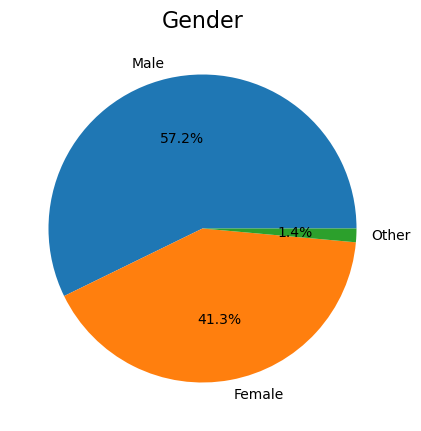

In [54]:
wedge_size =  df_customer_no_na['gender'].value_counts()
wedge_label = ['Male', 'Female', 'Other']
plt.figure(figsize = (5,5))
plt.pie(x = wedge_size, labels = wedge_label, autopct = '%1.1f%%')
plt.title('Gender', fontsize = 16)
plt.show()

**Observaciones:** Hay más clientes hombres (57,2%) que mujeres (41,3%), y una pequeña proporción (1,4%) de clientes de otros géneros.

**Grafico 2. Distribucion de la Edad de los consumidores**

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


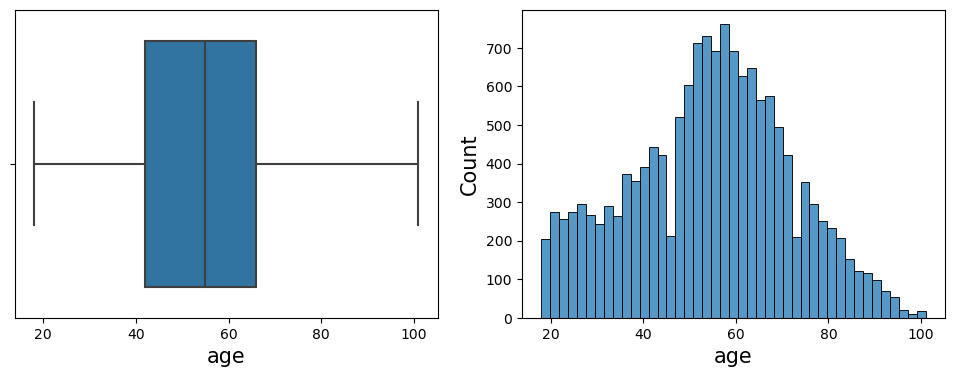

In [28]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'age', ax = axs[0])
sns.histplot(data = customers, x = 'age', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['age'].describe())

**Observaciones**
- El cliente más joven tiene 18 años y el mayor 101 años.
- La edad de los clientes sigue aproximadamente una distribución normal con la media y la desviación estándar iguales a 54 y 17.

A continuación, dividiré a los clientes en grupos de edad.

**Grafico 3. Distribucion de los consumidores por grupo de edad**

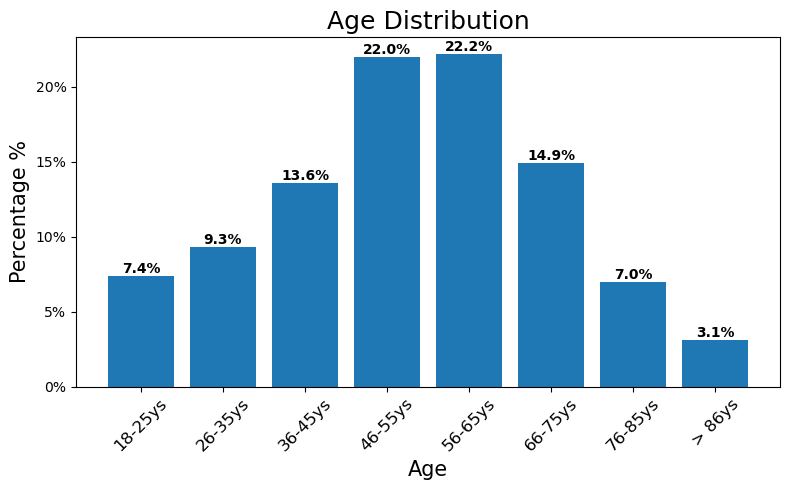

In [55]:
# Create a new column `age_group`
age_group = pd.cut(customers['age'],
      bins = [customers['age'].min(), 26, 36, 46, 56, 66, 76, 86, customers['age'].max()],
      labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys'])
customers['age_group'] = age_group

# Visualize customers by age groups
age_group_percentage = (customers.value_counts('age_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,25,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Age Distribution', fontsize = 18)

bar_plot = plt.bar(x = age_group_percentage.index.values, height = age_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(age_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

**Observaciones**
- El grupo de edad más numeroso de clientes es el de 56 a 65 años, seguido de cerca por el grupo de edad de 46 a 55 años. El tercer grupo de edad más grande es el de 66 a 75 años.
- Los 3 grupos de edad principales representan aproximadamente el 60% de los clientes.
- Esto tiene sentido ya que las personas entre 46 y 75 años.

**Grafico 4. Distribucion de los Ingresos de los clientes*

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


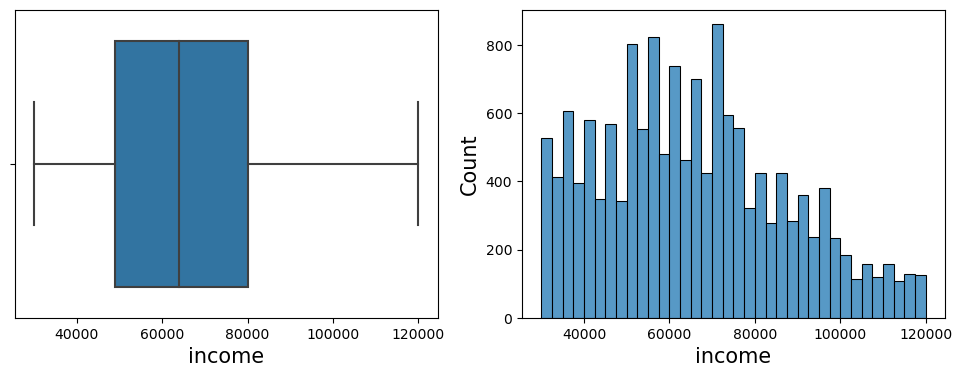

In [56]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'income', ax = axs[0])
sns.histplot(data = customers, x = 'income', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['income'].describe())

**Grafica 5. Distribucion de los consumidores por grupos de ingresos**

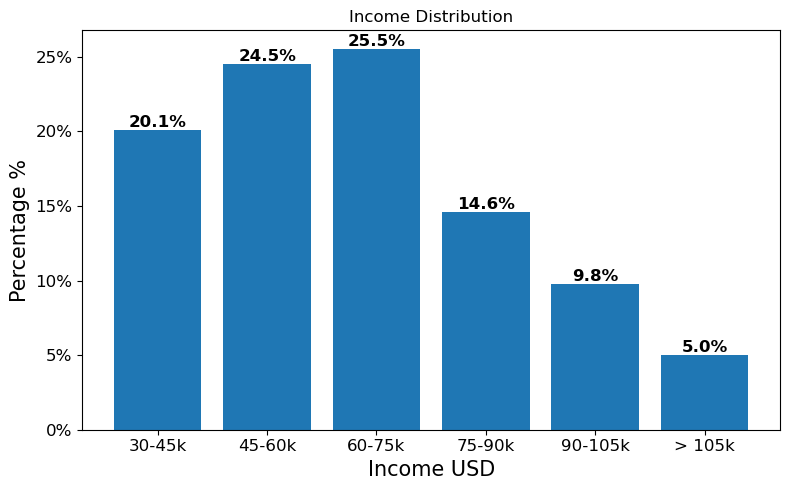

In [57]:
# Create a new column `income_group`
income_group = pd.cut(customers['income'],
      bins = [customers['income'].min(), 45000, 60000, 75000, 90000, 105000, customers['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
customers['income_group'] = income_group

# Visualize customers by income groups
income_group_percentage = (customers.value_counts('income_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,30,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('Income USD', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Income Distribution')

bar_plot = plt.bar(x = income_group_percentage.index.values, height = income_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(income_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold', fontsize = 12)

plt.tight_layout()
plt.show()

**Observaciones:**
- Los ingresos de los clientes tienen un rango de 30k a 120k, con un promedio de 65,4k.
- Los 2 grupos de ingresos principales están formados por clientes con ingresos anuales de 60-75 000 y 45-60 000. Estos representan aproximadamente el 50% de los clientes.
- La distribución del ingreso entre los clientes puede, en gran medida, coincidir con la de toda la población.


Crear un nuevo df centrándose en el momento en que los clientes se convirtieron en miembros, para vizualizar como ha crecido.

In [58]:
# Create a new df focusing on the time customers became members
df_member = customers[['id', 'became_member_on']]

# Add columns `year`, `month`, `day_of_week`
df_member = df_member.assign(year = df_member.became_member_on.dt.year,
                             month = df_member.became_member_on.dt.month,
                             day = df_member.became_member_on.dt.day,
                             month_name = df_member.became_member_on.dt.month_name(),
                             day_of_week = df_member.became_member_on.dt.weekday,
                             day_name = df_member.became_member_on.dt.day_name())
df_member.head(3)

,id,became_member_on,year,month,day,month_name,day_of_week,day_name
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,2017,7,15,July,5,Saturday
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,2017,5,9,May,1,Tuesday
2,e2127556f4f64592b11af22de27a7932,2018-04-26,2018,4,26,April,3,Thursday


**Grafico 6. Distribucion del numero de Nuevos Miembros desde el 2013 - 2018**

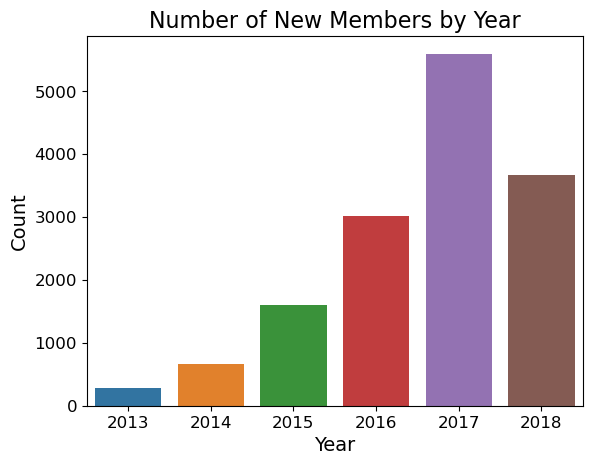

In [59]:
sns.countplot(data = df_member, x = 'year')
plt.title('Number of New Members by Year', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Year', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

#### Daily member growth

In [60]:
p = df_member.value_counts('became_member_on').sort_index()
df_member_growth = pd.DataFrame(index = p.index.values, data = p.values, columns = ['Number of New Members'])

In [61]:
# There are four phases with clearly different daily growth
phase_1 = df_member_growth.loc['2013-july': '2015-july']
len_phase_1 = phase_1.shape[0]
mean_phase_1 = phase_1.mean().values

phase_2 = df_member_growth.loc['2015-august': '2017-july']
len_phase_2 = phase_2.shape[0]
mean_phase_2 = phase_2.mean().values

phase_3 = df_member_growth.loc['2017-august': '2018-jan']
len_phase_3 = phase_3.shape[0]
mean_phase_3 = phase_3.mean().values

phase_4 = df_member_growth.loc['2018-feb': '2018-july']
len_phase_4 = phase_4.shape[0]
mean_phase_4 = phase_4.mean().values

**Grafico 7. Distribucion del numero de Nuevos Miembros desde el 2013-2018 mensual**

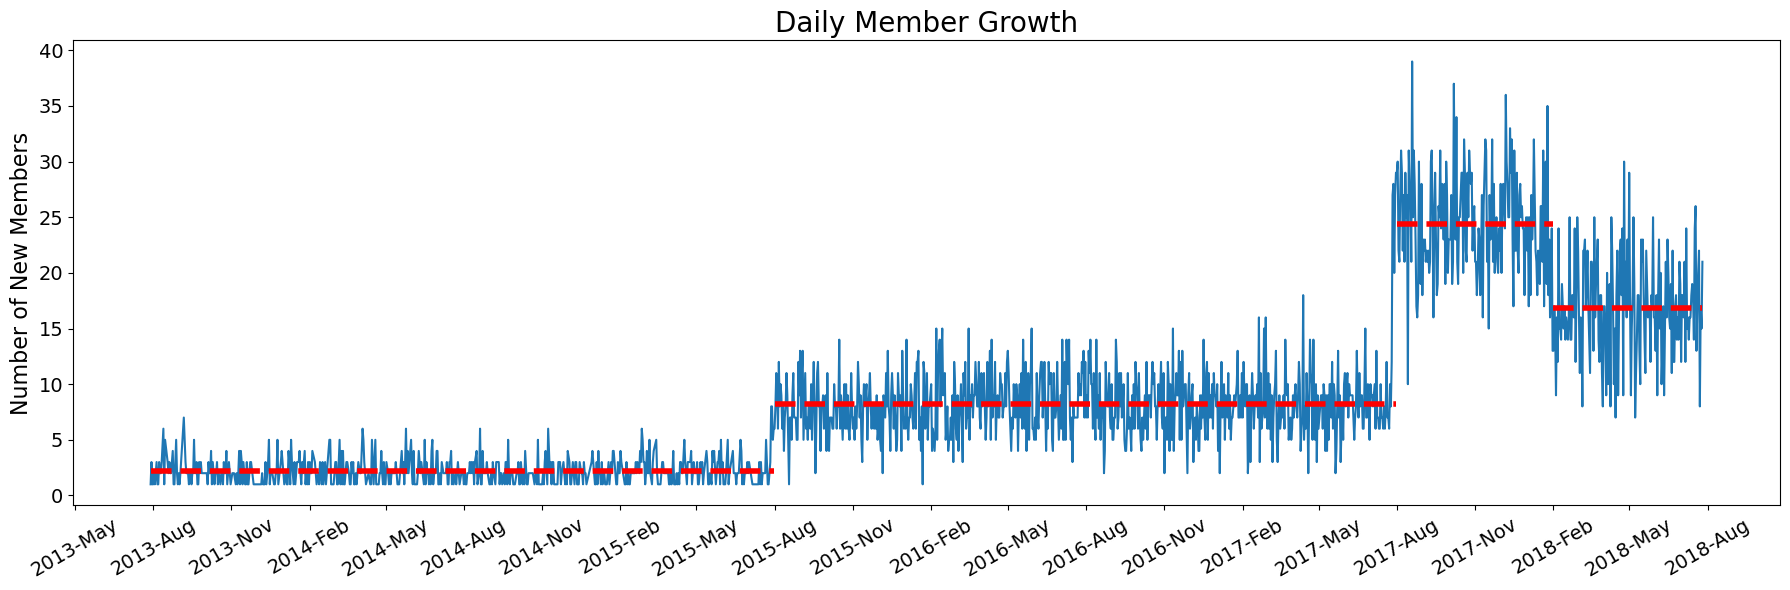

In [67]:
# Visualize
plt.figure(figsize = (18,6))
ax = sns.lineplot(x = df_member_growth.index.values, y = df_member_growth['Number of New Members'])
date_format = mdates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))

plt.plot(phase_1.index.values, np.ones(len_phase_1)*mean_phase_1, '--r', lw = 4)
plt.plot(phase_2.index.values, np.ones(len_phase_2)*mean_phase_2, '--r', lw = 4)
plt.plot(phase_3.index.values, np.ones(len_phase_3)*mean_phase_3, '--r', lw = 4)
plt.plot(phase_4.index.values, np.ones(len_phase_4)*mean_phase_4, '--r', lw = 4)

plt.xticks(text = ax.xaxis.get_label(), fontsize = 14, rotation = 30)
plt.yticks(text = ax.yaxis.get_label(), fontsize = 14)
plt.ylabel('Number of New Members', fontsize = 16)
plt.title('Daily Member Growth', fontsize = 20)
plt.tight_layout()
plt.show()

**Observaciones:**
- Los datos contienen clientes que se hicieron miembros desde julio de 2013 hasta julio de 2018.
- Muy pocos clientes (~2,2) eligieron convertirse en miembros desde 2013 hasta mediados de 2015.
- El número de nuevos miembros empezó a aumentar a partir de mediados de 2015 y realmente despegó a partir de mediados de 2017. La empresa debe haber tenido algunas campañas exitosas a mediados de 2015 y mediados de 2017 que impulsaron drásticamente el crecimiento de miembros.
- Sin embargo, desde principios de 2018 el crecimiento del número diario cayó un 31% (de 24,4 a 16,8). Quizás entonces se aplicaron algunas estrategias nuevas que tuvieron un impacto negativo en el crecimiento de los miembros.


**Grafico 8. Distribucion de la edad con respecto al genero**

              age
gender           
F       57.544950
M       52.116690
O       54.400943


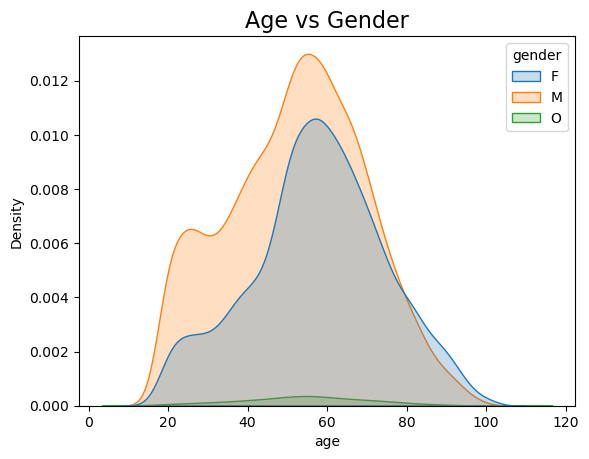

In [68]:
print(customers.groupby('gender').agg({'age': 'mean'}))
sns.kdeplot(data = customers, x = 'age', hue = 'gender', fill = True)
plt.title('Age vs Gender', fontsize = 16)
plt.show()

**Observaciones:**
- El número de clientes femeninos y masculinos sigue aproximadamente una distribución normal.
- Existe una mayor proporción de clientes jóvenes en hombres que en mujeres.
- Las clientas, los clientes masculinos y los clientes de otros géneros tienen una edad media de 57,5, 52,1 y 54,4 años.

**Grafico 9. Distribucion de los ingresos con respecto al genero

              income
gender              
F       71306.412139
M       61194.601603
O       63287.735849


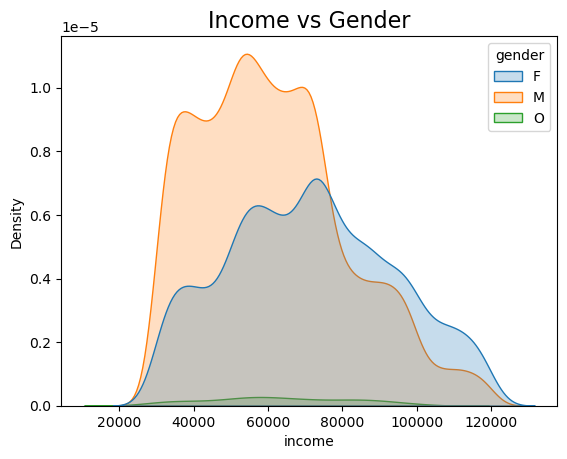

In [69]:
print(customers.groupby('gender').agg({'income': 'mean'}))
sns.kdeplot(data = customers, x = 'income', hue = 'gender', fill = True)
plt.title('Income vs Gender', fontsize = 16)
plt.show()

**Observaciones**
- Los ingresos de las clientas siguen aproximadamente una distribución normal. Esto indica que las clientas de todo el rango de ingresos disfrutan de los productos de la empresa.
- Los ingresos de los clientes masculinos están sesgados hacia la derecha. Esto significa que entre los clientes masculinos de la empresa, más personas se encuentran en la mitad inferior del espectro de ingresos (entre los clientes, no entre la población de EE. UU., como se muestra a continuación).
- Las clientas tienen unos ingresos medios mucho más altos que los de otros géneros. Esto tal vez se deba a que, en promedio, son mayores que otros grupos de género, suponiendo que los clientes mayores tengan ingresos más altos (a continuación se comprobará si esta suposición es cierta).
- Los ingresos medios de las clientas, los clientes masculinos y los clientes de otros géneros son 71k, 61k y 63k.

**Grafico 10. Distribucion del ingreso respecto a la edad**

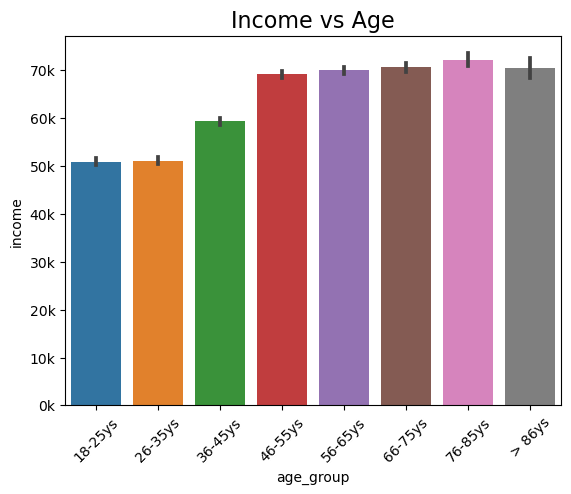

In [70]:
sns.barplot(data = customers, x = 'age_group', y = 'income')
plt.xticks(rotation = 45)
ytick_labels = [str(i) + 'k' for i in (np.arange(0, 80000, 10000) / 1000).astype(int)]
plt.yticks(np.arange(0, 80000, 10000), labels = ytick_labels)
plt.title('Income vs Age', fontsize = 16)
plt.show()

**Observaciones**

- Los clientes de los dos grupos de edad más jóvenes (de 18 a 35 años) tienen un ingreso anual promedio de aproximadamente 51 mil dólares. El grupo de mediana edad (36-55 años) tiene un ingreso anual promedio de alrededor de 65.000 dólares. Todos los grupos de edad mayores de 56 años tienen un ingreso anual promedio muy similar de alrededor de 70 mil. En promedio, los clientes mayores de la empresa tienen ingresos más altos.


- Los clientes que consumen starbucks en todos los grupos de edad tienen un ingreso promedio mucho más alto que el ingreso medio de los ciudadanos estadounidenses (30,119 USD en 2018).
    
    


**Grafico 11. Vizualizaciones de los tipos de ofertas**

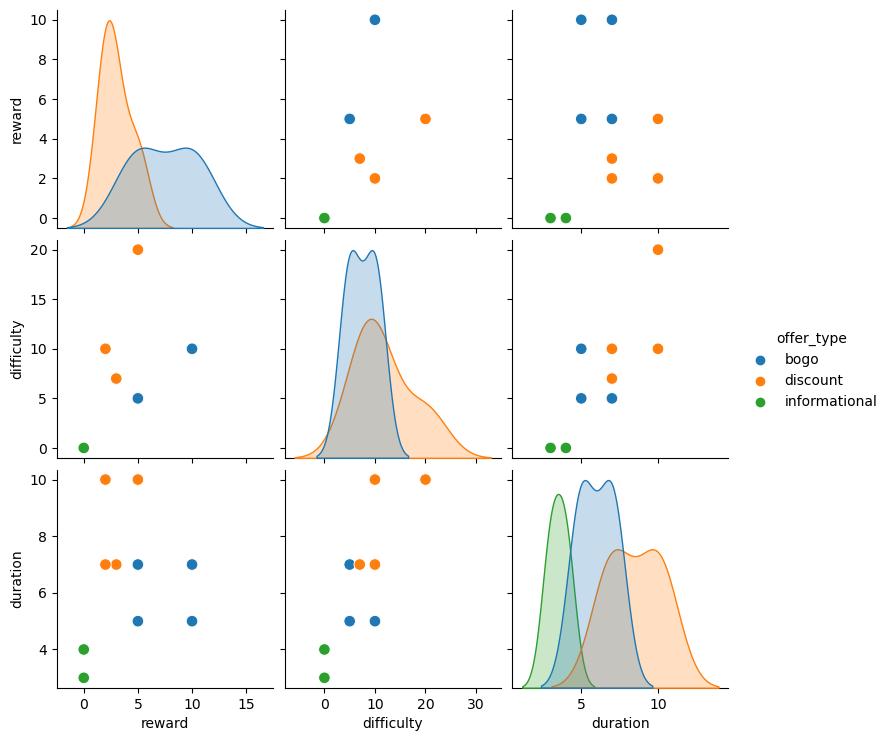

In [71]:
sns.pairplot(offers, hue = 'offer_type', 
             plot_kws = dict(marker="o", s=70),); plt.show()

**Observaciones**
- Hay 4 ofertas 'bogo' (es decir, compre una y llévese otra), 4 ofertas de 'descuento' y 2 ofertas 'informativas'.
- Las ofertas de 'descuento' suelen tener la duración más larga, seguidas de las ofertas de 'bogo'. Las ofertas 'informativas' tienen la duración más corta.
- Las ofertas de "descuento" tienden a tener mayor dificultad pero menores recompensas en comparación con las ofertas de "bogo".
- La dificultad de la oferta parece estar correlacionada positivamente con la recompensa de la oferta.
- La duración de la oferta parece correlacionarse negativamente con la recompensa y positivamente con la dificultad, cuando se excluyen las ofertas "informativas" (en realidad no tienen recompensa ni dificultad).


In [72]:
customer_behavior = pd.DataFrame(columns = ['person', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent'])

In [73]:
# Remove rows of customers with missing gender and income
id_to_remove = missing_income['id']
transcripts_filtered = transcripts[~transcripts['person'].isin(id_to_remove)].reset_index(drop = True)

# Add data to `person`, ordered in ascending order
customer_behavior['person'] = transcripts_filtered.value_counts('person').sort_index().index.values

In [74]:
# Aggregate df transcripts
transcripts_filtered = transcripts_filtered.sort_values('person')
transcripts_grouped = transcripts_filtered.groupby(['person', 'event']).count()
transcripts_grouped.head()

dict_key  dict_value  \
person                           event                                   
0009655768c64bdeb2e877511632db8f offer completed         3           3   
                                 offer received          5           5   
                                 offer viewed            4           4   
                                 transaction             8           8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed         3           3   

                                                  hours_since_start  \
person                           event                                
0009655768c64bdeb2e877511632db8f offer completed                  3   
                                 offer received                   5   
                                 offer viewed                     4   
                                 transaction                      8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed                  3   

                                                  days_since_start  
person                           event                              
0009655768c64bdeb2e877511632db8f offer completed                 3  
                                 offer received                  5  
                                 offer viewed                    4  
                                 transaction                     8  
0011e0d4e6b944f998e987f904e8c1e5 offer completed                 3

In [75]:
# Set `person` as index for easy slicing
customer_behavior.set_index('person', inplace = True)

# Add data to `num_received`, `num_viewed`, `num_completed` and `num_transactions`
for person_id in customer_behavior.index.values:
    if (person_id, 'offer received') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_received'] = transcripts_grouped.loc[(person_id, 'offer received'), 'dict_key']
    if (person_id, 'offer viewed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_viewed'] = transcripts_grouped.loc[(person_id, 'offer viewed'), 'dict_key']
    if (person_id, 'offer completed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_completed'] = transcripts_grouped.loc[(person_id, 'offer completed'), 'dict_key']
    if (person_id, 'transaction') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_transactions'] = transcripts_grouped.loc[(person_id, 'transaction'), 'dict_key']
    

In [76]:
# Calculate how much money each customer spent during the month of the campaign
money_spent = transcripts_filtered[transcripts_filtered['event'] == 'transaction'].groupby('person').agg({'dict_value': 'sum'})

# Add to `money_spent`
customer_behavior['money_spent'] = money_spent
customer_behavior.head(3)

,num_received,num_viewed,num_completed,num_transactions,money_spent
person,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,8,127.6
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,5,3,3,8,196.86


In [77]:
customer_behavior.isna().sum()

num_received           5
num_viewed           150
num_completed       2839
num_transactions     333
money_spent          333
dtype: int64

In [78]:
# Replace NA with 0
customer_behavior.fillna(0, inplace = True)
customer_behavior.isna().sum()

num_received        0
num_viewed          0
num_completed       0
num_transactions    0
money_spent         0
dtype: int64

**Grafico 12. Distribucion de las ofertas**

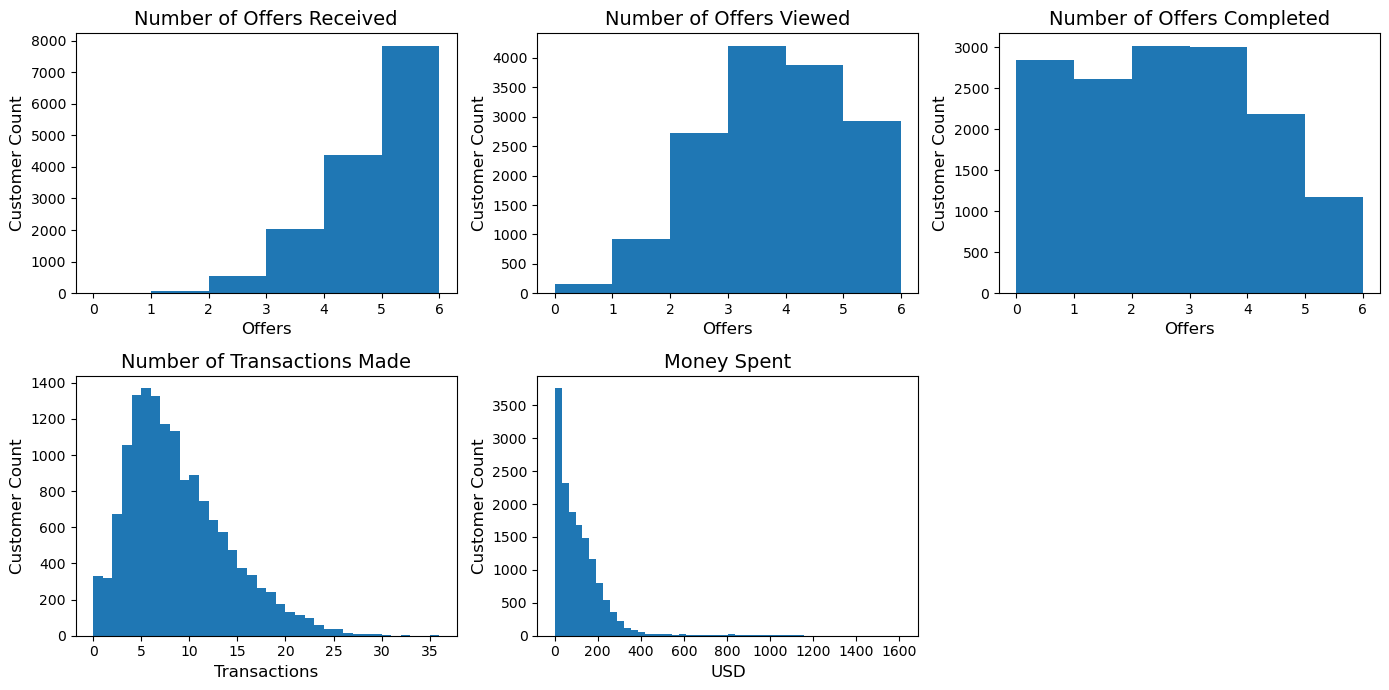

In [79]:
# Check the features with plots
fig, axs = plt.subplots(2,3, figsize = (14, 7))
fig_titles = ['Number of Offers Received', 'Number of Offers Viewed', 'Number of Offers Completed', 'Number of Transactions Made', 'Money Spent']
x_labels = ['Offers', 'Offers','Offers','Transactions','USD']
y_labels = 'Customer Count'

sub_row, sub_col = 0, 0

for i in range(5):
    if i < 3:
        sub_row = 0
        sub_col = i
        bins = customer_behavior.iloc[:, i].max()
        axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
        axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)

    else:
        sub_row = 1
        sub_col = i - 3
        if i == 3:
            bins = customer_behavior.iloc[:, i].max()
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
        else:
            bins = 50
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
    
    axs[sub_row, sub_col].set_title(fig_titles[i], fontsize = 14)
    axs[sub_row, sub_col].set_xlabel(x_labels[i], fontsize = 12)

axs[1,2].set_axis_off()
plt.tight_layout()
plt.show()

In [80]:
# Keep a copy of the df with `num_received`
customer_behavior_with_num_received = customer_behavior.copy()

# Drop `num_received`
customer_behavior.drop('num_received', axis = 1, inplace = True)
customer_behavior.head(3)

,num_viewed,num_completed,num_transactions,money_spent
person,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60
0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86


#### Remove outliers

In [81]:
customer_behavior['money_spent'].describe()

count    14825.000000
mean       117.028155
std        129.965016
min          0.000000
25%         31.450000
50%         87.040000
75%        160.900000
max       1608.690000
Name: money_spent, dtype: float64

El cuantil de 0,75 equivale sólo a unos 160 dólares, mientras que el máximo es diez veces mayor. Eliminaré el registro con el 2% superior en `money_spent` para ejecutar K-Means Clustering.


In [84]:
# Remove rows with top 2% in `money_spent`
q = customer_behavior['money_spent'].quantile(0.98)
rows_top_money_spent = customer_behavior[customer_behavior['money_spent'] >= q]

person_top_money_spent = rows_top_money_spent.index.values
customer_top_money_spent_removed = customer_behavior[customer_behavior['money_spent'] < q]

print('Number of rows removed:', rows_top_money_spent.shape[0])

Number of rows removed: 297


**Grafico 13. Distribucion de las impresiones**

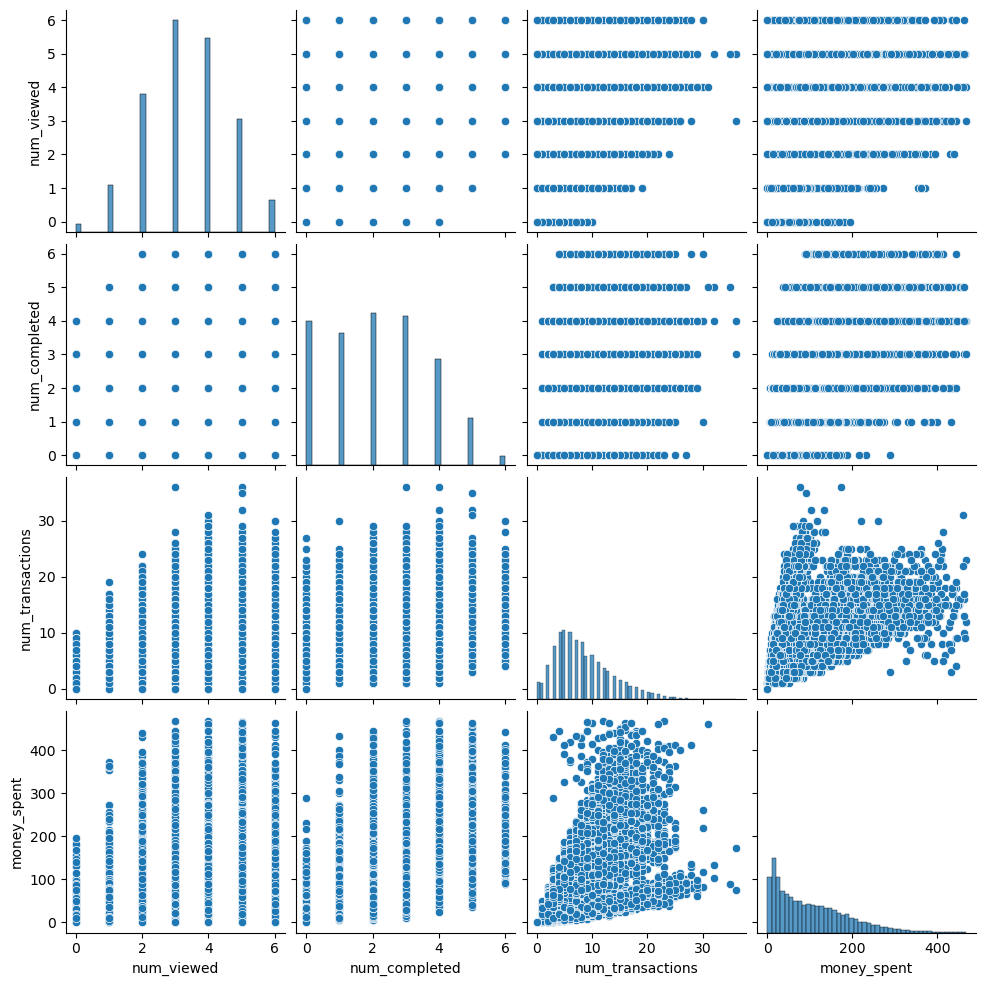

In [85]:
customer_behavior_filtered = customer_top_money_spent_removed.copy()
sns.pairplot(customer_behavior_filtered); plt.show()

### K-Means Clustering

In [86]:
scaler_customer_behavior = StandardScaler()
scaler_customer_behavior.fit(customer_behavior_filtered)
customer_behavior_scaled = scaler_customer_behavior.transform(customer_behavior_filtered)
pd.DataFrame(data = customer_behavior_scaled, columns = customer_behavior_filtered.columns.values).head(3)

,num_viewed,num_completed,num_transactions,money_spent
0,0.501233,0.531352,-0.060069,0.277234
1,1.276977,0.531352,-0.639666,-0.281415
2,-0.274511,0.531352,-0.060069,1.080974


### Optimal number of clusters _k_

**Grafico 14. Distribucion del numero optimo de clusters**

C:\Users\augon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\augon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\augon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\augon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\augon\anaconda3\lib\site-packages\sklearn\clust

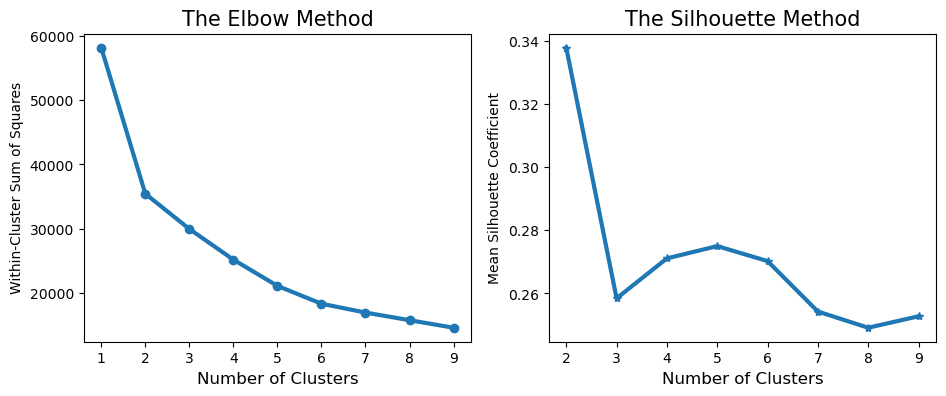

In [88]:
df_feature = customer_behavior_scaled
wcss = []
sil_score = []
max_clusters = 10

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(df_feature)
    # calculate wcss for the Elbow Method
    wcss.append(kmeans.inertia_)
    
    # calculate the mean Silhouette coefficient
    if k >= 2:
        labels = kmeans.labels_
        sil_score.append(metrics.silhouette_score(df_feature, labels))

        # Plot
fig, axs = plt.subplots(1,2, figsize = (11,4))
axs[0].plot(np.arange(1, max_clusters), wcss, marker = 'o', lw = 3)
axs[0].set_xlabel('Number of Clusters', fontsize = 12)
axs[0].set_ylabel('Within-Cluster Sum of Squares')
axs[0].set_title('The Elbow Method', fontsize = 15)

axs[1].plot(np.arange(2, max_clusters), sil_score, marker = '*' , lw = 3)
axs[1].set_xlabel('Number of Clusters', fontsize = 12)
axs[1].set_ylabel('Mean Silhouette Coefficient')
axs[1].set_title('The Silhouette Method', fontsize = 15)
plt.show()


En el gráfico del codo, se puede observar (no fácilmente) que a partir de k = 5, la suma de cuadrados dentro del grupo (WCSS) deja de disminuir a un ritmo creciente.
En el gráfico de silueta, el máximo se encuentra en k = 5 (k = 2 excluido).
5 segmentos pueden parecer muy tranquilos, pero si los grupos muestran una clara diferencia en las características, el resultado aún debería ser interpretable.
Por lo tanto, se utilizarán 5 grupos para el análisis de agrupamiento de K-Means.

### K-Means Clustering

C:\Users\augon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    4018
1    2901
2    2649
3    1584
4    3376
dtype: int64

 ************************************************************
Silhouette Score: 0.274991463208214

 ************************************************************
        num_viewed num_completed num_transactions money_spent
              mean          mean             mean        mean
cluster                                                      
0              2.1           0.7              5.0        34.6
1              4.5           4.1             12.2       223.0
2              4.5           1.5              4.5        50.3
3              3.5           2.0             17.1        72.2
4              2.8           2.9              7.7       140.2


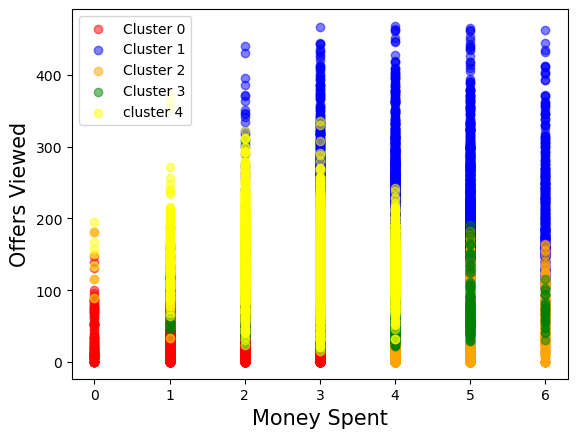

In [89]:
k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters = k, random_state = 10)
kmeans.fit_transform(df_feature)
customer_with_cluster = customer_behavior_filtered.assign(cluster = kmeans.labels_)
print(customer_with_cluster.value_counts('cluster').sort_index())

line_sep = '*' * 60
print('\n', line_sep)
print('Silhouette Score:', metrics.silhouette_score(df_feature, labels = kmeans.labels_))

#
cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])
print('\n', line_sep)
print(cluster_info.round(1))

# Plot
color_list = ['red', 'blue', 'orange', 'green', 'yellow']
legend_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'cluster 4']
for i in range(k):
    plt.scatter(customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'num_viewed'],
               customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'money_spent'],
               c = color_list[i], label = legend_list[i], alpha = 0.5)
plt.ylabel('Offers Viewed', fontsize = 15)
plt.xlabel('Money Spent', fontsize = 15)
plt.legend(legend_list)
plt.show()


**Observaciones**
Aunque la puntuación de Silhouette es bastante baja (0,275), los grupos se pueden identificar cuando se trazan utilizando `money_spent` y `num_viewed`. A continuación, comprobaré los grupos visualmente con más detalle al trazarlos en subtramas separadas.

#### Clasificación con regresión logística multiclase

In [94]:
# Split data for train and test
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [95]:
# Multiclass logistic regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Check test accurracy
y_predict = clf.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.993805918788713


#### Clasificación con K-vecinos más cercanos

In [92]:
# K-Nearest Neighbors Classificaiton
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

# Check test accuracy
y_predict = knn.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.9855471438403304


**Interpretación de la alta precisión de la prueba:**

Ambos métodos de clasificación lograron una alta precisión de prueba al utilizar las etiquetas proporcionadas por el análisis de agrupamiento de K-Means como objetivos. Esto indica que los patrones identificados por K-Means Clustering para cada grupo existen y son lo suficientemente claros como para ser capturados por ambos algoritmos de clasificación para más del 98% de las muestras.

Estos dos modelos de clasificación entrenados se utilizarán para encontrar a qué grupo pertenecen los clientes con valores atípicos del 2% en una sección posterior.

### Visualización e interpretación de resultados de agrupación

### Visualizar clústeres por separado

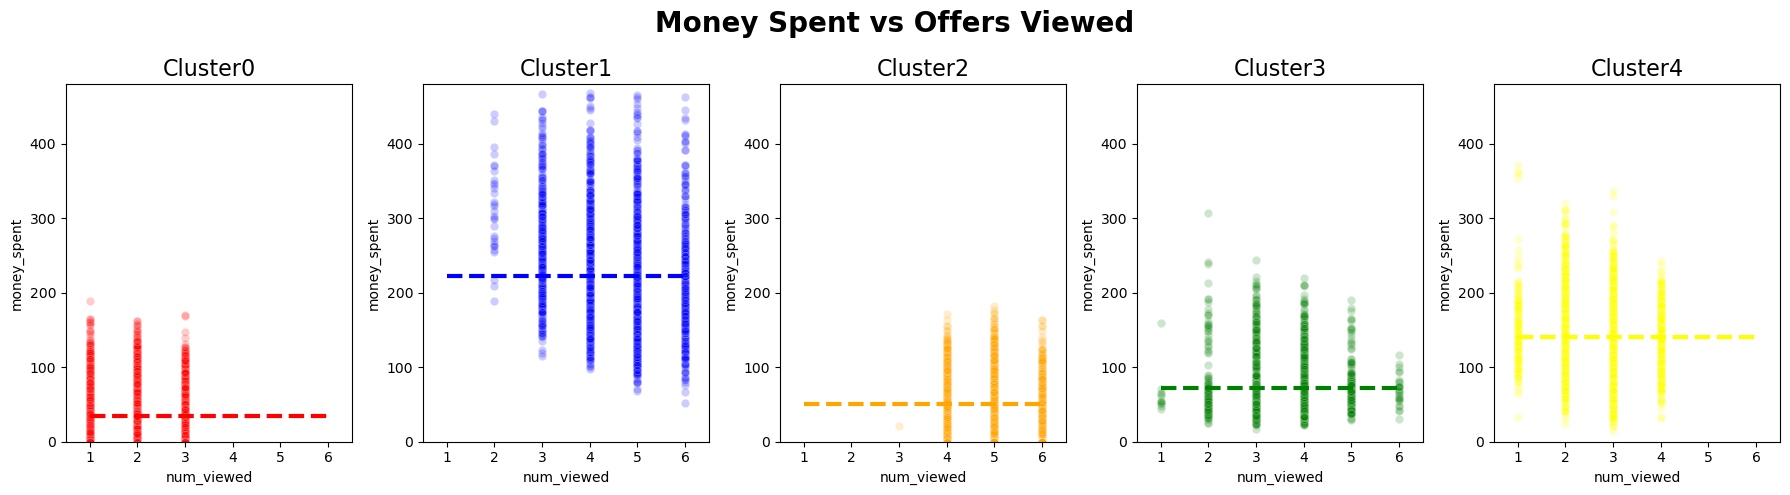

In [96]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'money_spent', alpha = 0.2, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'money_spent': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0,480))
fig.suptitle('Money Spent vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

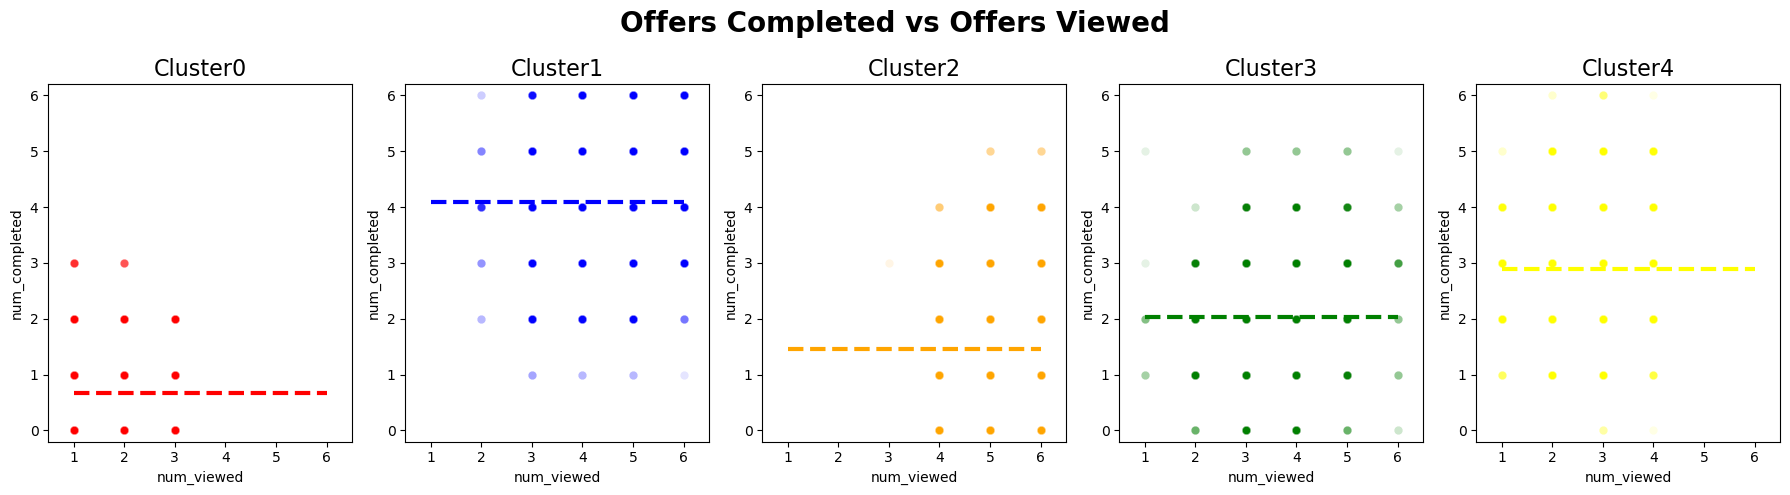

In [97]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_completed', alpha = 0.1, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_completed': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((-0.2,6.2))
fig.suptitle('Offers Completed vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

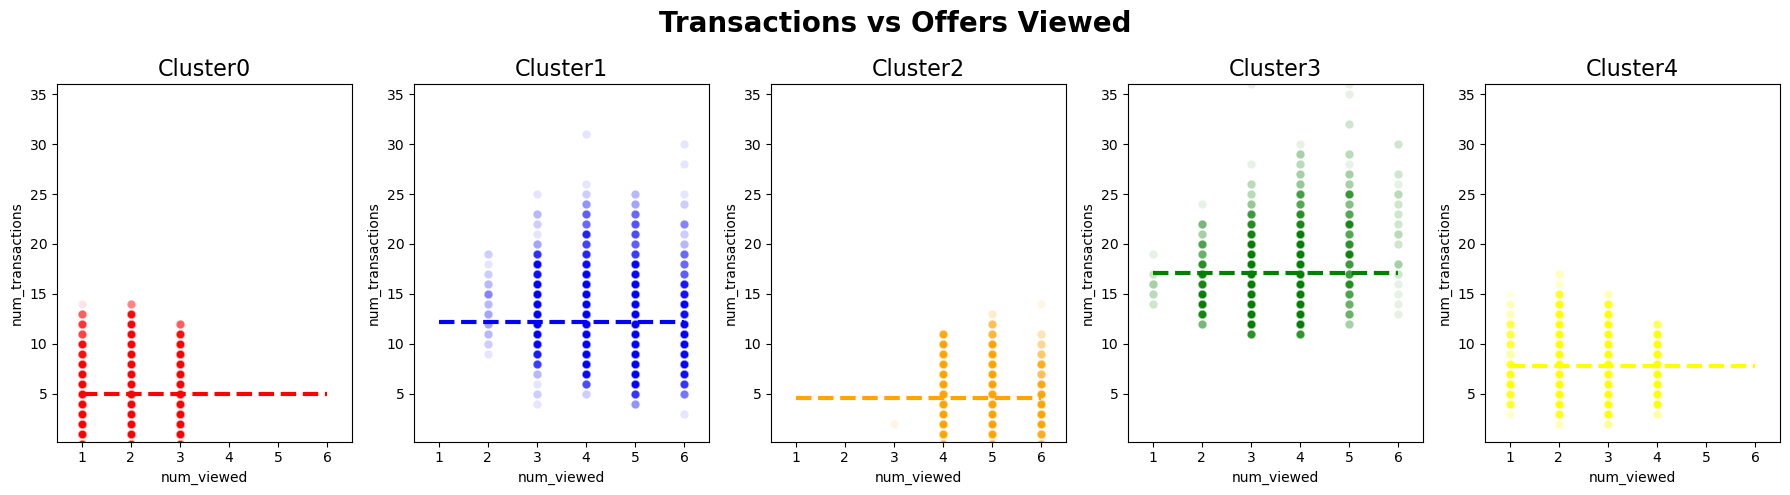

In [98]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_transactions', alpha = 0.1, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_transactions': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0.2,36))
fig.suptitle('Transactions vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

**Observaciones:**
- Tenga en cuenta que las líneas discontinuas son los valores promedio de cada grupo.
- Las diferencias son claras en los tres gráficos de características por pares. Esto refleja que la agrupación es efectiva incluso si la puntuación de Silhouette es baja.

### Rendimiento relativo de cada cluster en cada campo

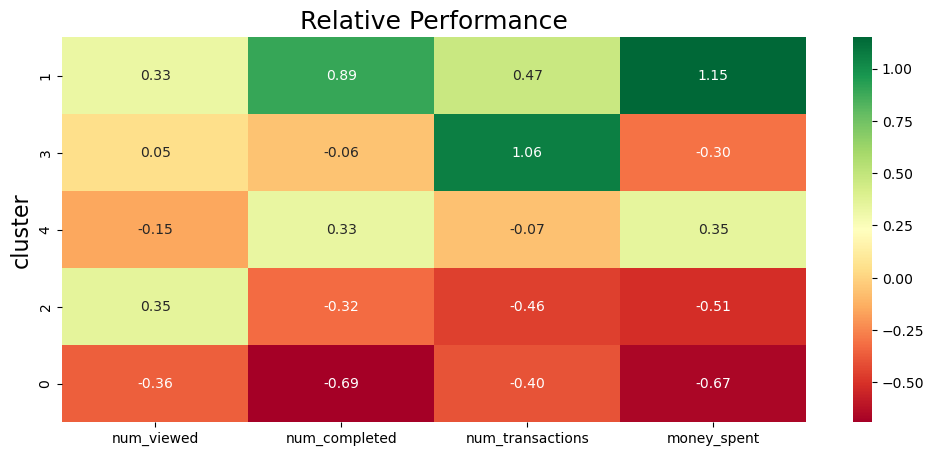

In [99]:
# Calculate the relative performace of cluster's attribute values compared to all customers as a population
cluster_mean = customer_with_cluster.groupby('cluster').mean()
population_mean = customer_with_cluster.mean()
relative_importance = (cluster_mean / population_mean[0 :-1]) - 1

# Sort clusters by overall (summation) performance
importance_ranking = relative_importance.sum(axis = 1).sort_values(ascending = False).index.values
relative_importance = relative_importance.reindex(importance_ranking)

# Plot the heatmap
plt.figure(figsize = (12, k))
plt.title('Relative Performance', fontsize = 18)
plt.xlabel('Feature', fontsize = 16)
plt.ylabel('Cluster', fontsize = 16)
sns.heatmap(data = relative_importance, annot = True, fmt = '.2f', cmap = 'RdYlGn')
plt.show()

In [100]:
# Calculated the mean of all features for each cluster
temp = pd.merge(customer_with_cluster, customer_behavior_with_num_received['num_received'], left_index = True, right_index = True)
cluster_means = temp.groupby('cluster').mean().round(3)
cluster_means = cluster_means.reindex(importance_ranking)
cluster_means

,num_viewed,num_completed,num_transactions,money_spent,num_received
cluster,,,,,
1,4.452,4.096,12.223,222.970,5.094
3,3.512,2.028,17.098,72.242,4.674
4,2.845,2.887,7.744,140.156,4.150
2,4.541,1.463,4.529,50.347,5.029
0,2.143,0.671,4.992,34.568,3.881


In [110]:
# Create the df for summarizing by clusters
cluster_summary = pd.DataFrame(columns = ['cluster', 'frequency', 'avg_purchase_value', 'offer_complete_rate', 'offer_sensitivity'])
cluster_summary['cluster'] = index = np.arange(k)
cluster_summary.set_index('cluster', drop = True, inplace = True)


In [111]:
# Add values to df `cluster_summary`
cluster_summary['frequency'] = cluster_means['num_transactions'].round(1)
cluster_summary['avg_purchase_value'] = (cluster_means['money_spent'] / cluster_means['num_transactions']).round(1)
cluster_summary['offer_complete_rate'] = (cluster_means['num_completed'] / cluster_means['num_received']).round(2)
cluster_summary['offer_sensitivity'] = (cluster_means['num_completed'] / cluster_means['num_transactions']).round(2)

In [112]:
# Redorder index
cluster_summary = cluster_summary.reindex(importance_ranking)
cluster_summary

,frequency,avg_purchase_value,offer_complete_rate,offer_sensitivity
cluster,,,,
1,12.2,18.2,0.80,0.34
3,17.1,4.2,0.43,0.12
4,7.7,18.1,0.70,0.37
2,4.5,11.1,0.29,0.32
0,5.0,6.9,0.17,0.13


## 4.4 Datos demográficos de los clientes de cada grupo

In [113]:
# Scale features
rows_top_money_spent_scaled = scaler_customer_behavior.transform(rows_top_money_spent)

# Have a direct look at the clustering result
kmeans.predict(rows_top_money_spent_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
cluster_kmeans = kmeans.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_kmeans, return_counts = True)

print('According to the KMeans model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i])) 

According to the KMeans model, customers spending top 2% belong to:
295 customers belongs to Cluster 1.
2 customers belongs to Cluster 4.


##### Utilice el modelo de regresión logística entrenado para decidir a qué grupo pertenecen el 2% de los clientes.

In [115]:
cluster_logistic = clf.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_logistic, return_counts = True)

print('According to the Logistic Regression model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i])) 

According to the Logistic Regression model, customers spending top 2% belong to:
293 customers belongs to Cluster 1.
4 customers belongs to Cluster 4.


##### Utilice el modelo KNN entrenado para decidir a qué grupo pertenecen el 2% de los clientes.

In [116]:
cluster_KNN = knn.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_KNN, return_counts = True)

print('According to the KNN model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i])) 

According to the KNN model, customers spending top 2% belong to:
297 customers belongs to Cluster 1.


Según los tres modelos, más del 98,5% de los clientes que gastaron el 2% superior pertenecen al grupo 1 (Clientes más valiosos). Luego los agregaré todos al grupo 1 para simplificar.